##### Analysis of global cargo ships dataset

##### Source: https://www.kaggle.com/datasets/ibrahimonmars/global-cargo-ships-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:/Datasets/ships dataset/Ship_Uncleaned.csv')

In [3]:
df.head()

,Company_Name,ship_name,built_year,gt,dwt,size
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
1,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
2,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
3,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
4,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74


In [4]:
df.dtypes

Company_Name    object
ship_name       object
built_year       int64
gt               int64
dwt              int64
size            object
dtype: object

In [5]:
df.columns = df.columns.str.replace("ship_name", "ship_type")
df.columns = df.columns.str.replace("gt", "gross tonage")
df.columns = df.columns.str.replace("dwt", "deadweight")

In [6]:
df.head()

,Company_Name,ship_type,built_year,gross tonage,deadweight,size
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
1,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
2,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
3,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
4,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74


In [7]:
#spliting 'size' column into length and width
df[['length', 'width']] = df['size'].str.split('/', expand = True).astype(int)
df = df.drop(columns= 'size')

In [8]:
unique_types = df['ship_type'].unique()
print(unique_types)

['Offshore Support Vessel' 'Container Ship' 'Bulk Carrier'
 'Passenger (Cruise) Ship' 'Crude Oil Tanker' 'LNG Tanker' 'FSO']


In [9]:
df['length'].value_counts().head()

292    640
300    520
333    400
290    200
330    180
Name: length, dtype: int64

In [10]:
# Summary statistics for numerical columns
df.describe()

,built_year,gross tonage,deadweight,length,width
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2011.660000,128046.050000,179971.460000,319.180000,50.015000
std,7.165699,43045.106352,88786.478168,32.416513,6.723546
min,1976.000000,89991.000000,7900.000000,272.000000,36.000000
25%,2009.000000,94761.750000,106146.250000,292.000000,45.000000
50%,2012.000000,113883.000000,179217.500000,300.000000,48.000000
75%,2016.000000,155140.500000,231111.750000,334.250000,57.000000
max,2023.000000,499167.000000,400694.000000,489.000000,74.000000


In [11]:
if isinstance(df, pd.DataFrame):
    print('yes')

yes


#### Let's see if there is a trend over the years to build bigger (longer) ships based on download data

<Axes: xlabel='built_year', ylabel='length'>

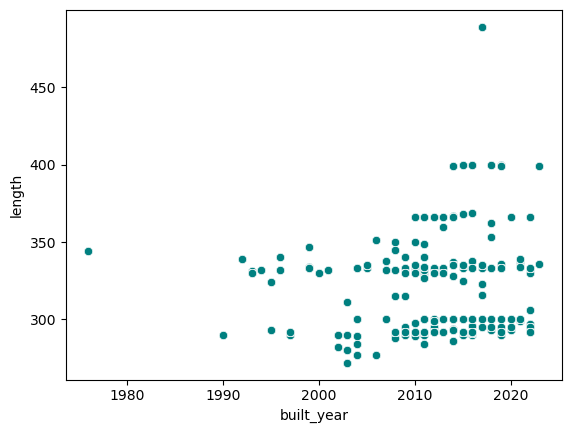

In [12]:
sns.scatterplot(data=df, x='built_year', y='length', color='teal')

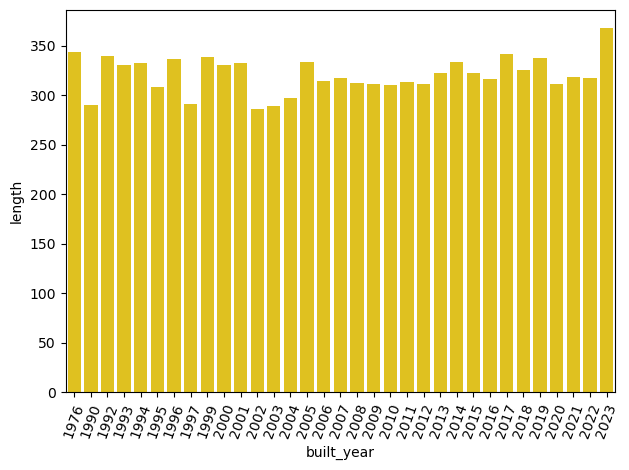

In [13]:
sns.barplot(data=df, x='built_year', y='length', color='gold',  errorbar = None) 

plt.xticks(rotation=70)
plt.tight_layout()

<Axes: xlabel='built_year', ylabel='length'>

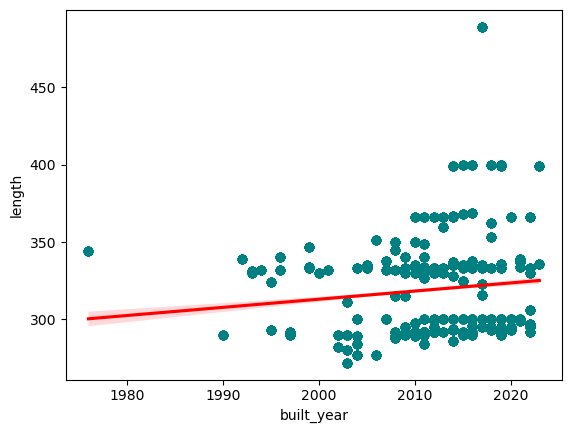

In [14]:
sns.regplot(data=df, x='built_year', y='length', color='teal', line_kws = {'color' : 'red'})

#### Regression line on regplot above shows a trend over the years. Let's see how it looks for container ships and bulk carriers:

Text(0.5, 1.0, 'Bulk carriers by mean values')

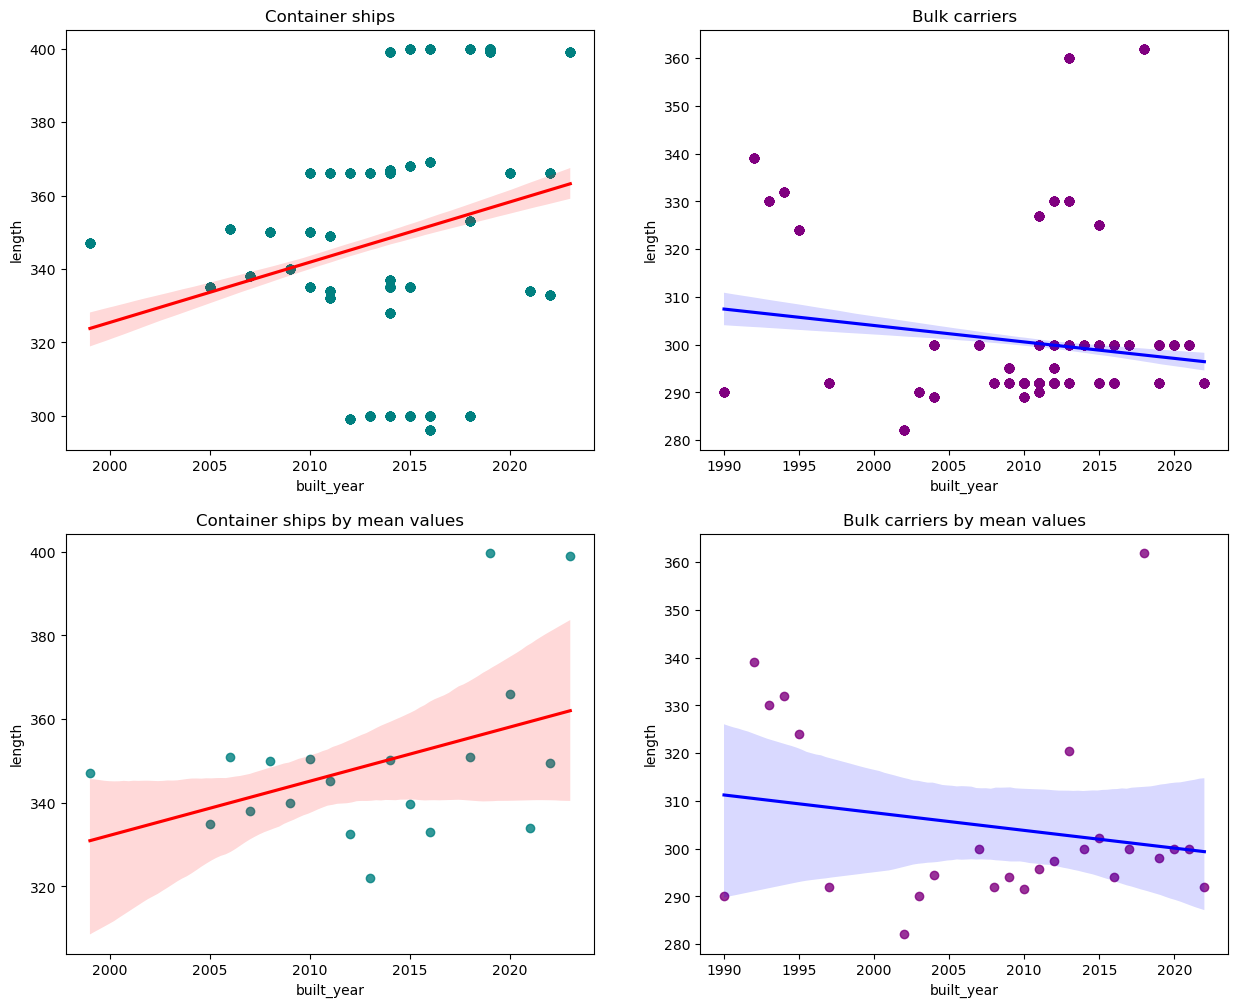

In [15]:
#length
df_containers = df.loc[df['ship_type'] == 'Container Ship']
df_bulk = df.loc[df['ship_type'] == 'Bulk Carrier']

df_containers1 = df_containers.groupby('built_year')['length'].mean().reset_index()
df_bulk1 = df_bulk.groupby('built_year')['length'].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.regplot(data=df_containers, x='built_year', y='length', color='teal', line_kws = {'color' : 'red'}, ax=axes[0, 0]).set_title("Container ships")
sns.regplot(data=df_bulk, x='built_year', y='length', color='purple', line_kws = {'color' : 'blue'}, ax=axes[0, 1]).set_title("Bulk carriers")
sns.regplot(data=df_containers1, x='built_year', y='length', color='teal', line_kws = {'color' : 'red'}, ax=axes[1, 0]).set_title("Container ships by mean values")
sns.regplot(data=df_bulk1, x='built_year', y='length', color='purple', line_kws = {'color' : 'blue'}, ax=axes[1, 1]).set_title("Bulk carriers by mean values")

In [16]:
#checking why xlabels start at different years
df_containers['built_year'].min()

1999

In [17]:
df_bulk.sort_values(by='built_year').head()

,Company_Name,ship_type,built_year,gross tonage,deadweight,length,width
3899,BAO CHANG HAI,Bulk Carrier,1990,90633,173329,290,46
3882,BAO CHANG HAI,Bulk Carrier,1990,90633,173329,290,46
3883,BAO CHANG HAI,Bulk Carrier,1990,90633,173329,290,46
3884,BAO CHANG HAI,Bulk Carrier,1990,90633,173329,290,46
3885,BAO CHANG HAI,Bulk Carrier,1990,90633,173329,290,46


#### As we can see, container ships tend to be built bigger and bigger as opposed to bulk carriers. Let's see how it looks in term of total deadweight.

Text(0.5, 1.0, 'Sum of deadweights of bulk carriers per year')

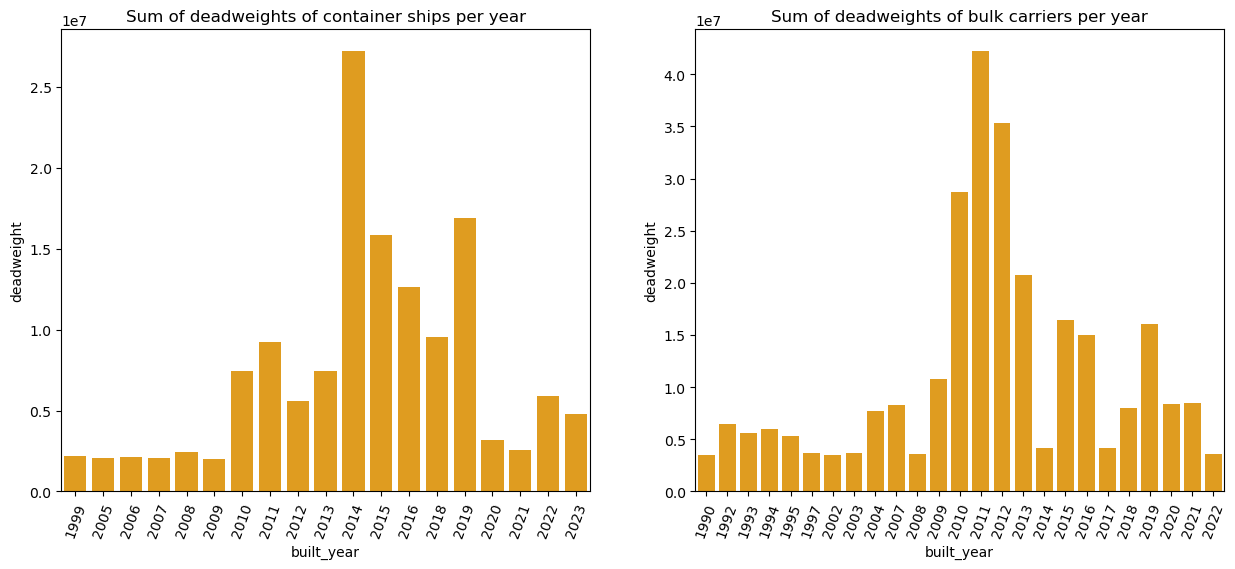

In [18]:
#deadweight
df_containers = df.loc[df['ship_type'] == 'Container Ship']
df_bulk = df.loc[df['ship_type'] == 'Bulk Carrier']

dwt_containers = df_containers.groupby('built_year')['deadweight'].sum().reset_index()
dwt_bulk = df_bulk.groupby('built_year')['deadweight'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, ax in enumerate(fig.axes):   # getting all axes of the fig object
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
    ax.tick_params(axis='x', labelrotation = 70)
    
sns.barplot(data=dwt_containers, x='built_year', y='deadweight', color='orange', ax=axes[0]).set_title("Sum of deadweights of container ships per year")
sns.barplot(data=dwt_bulk, x='built_year', y='deadweight', color='orange', ax=axes[1]).set_title("Sum of deadweights of bulk carriers per year")

#### Total deadweight of both container ships and bulk carriers seems to decrease over the years. The peak of deadweight for container ships was in 2014 and in 2011 for bulk carriers. 

#### How it looks in term of number of built ships:

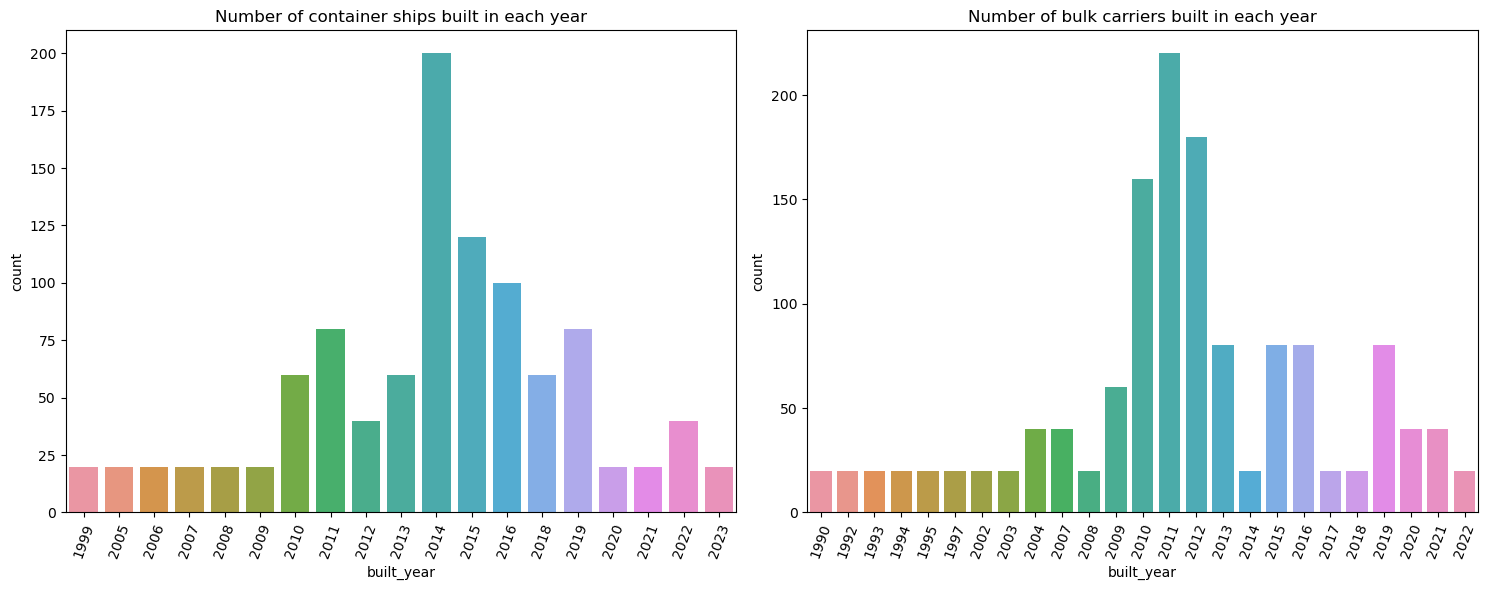

In [19]:
df['count'] = 1
df_containers = df.loc[df['ship_type'] == 'Container Ship']
df_bulk = df.loc[df['ship_type'] == 'Bulk Carrier']
num_of_container = df_containers.groupby(['built_year']).sum(numeric_only = True).reset_index()
num_of_bulk = df_bulk.groupby(['built_year']).sum(numeric_only = True).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
    ax.tick_params(axis='x', labelrotation = 70)

sns.barplot(data=num_of_container, x = 'built_year', y='count', ax=axes[0]).set_title('Number of container ships built in each year')
sns.barplot(data=num_of_bulk, x = 'built_year', y='count', ax=axes[1]).set_title('Number of bulk carriers built in each year')
plt.tight_layout()

#### or maybe let's do this easier:

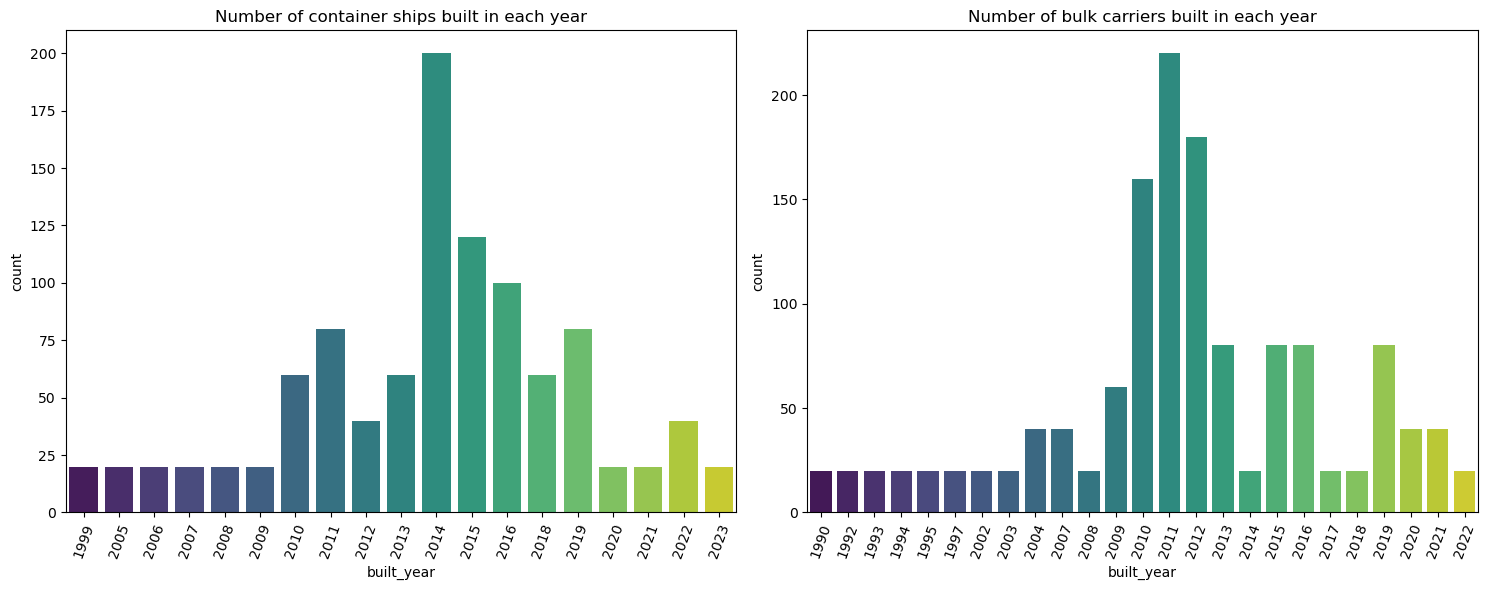

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
    ax.tick_params(axis='x', labelrotation = 70)
    
sns.countplot(data=df_containers, x='built_year', palette='viridis', ax=axes[0]).set_title('Number of container ships built in each year')
sns.countplot(data=df_bulk, x='built_year', palette='viridis', ax=axes[1]).set_title('Number of bulk carriers built in each year')
plt.tight_layout()


#### Highest volume of built ships

In [21]:
print('There were ' + str(num_of_container['count'].max()) + ' container ships built in 2014.')
print('There were ' + str(num_of_bulk['count'].max()) + ' bulk carriers built in 2011.')

There were 200 container ships built in 2014.
There were 220 bulk carriers built in 2011.


In [22]:
#Total amount of built container ships included in dataset
print('There were total amount of ' + str(num_of_container['count'].sum()) + ' container ships built.')
print('There were total amount of ' + str(num_of_bulk['count'].sum()) + ' bulk carriers built.')


There were total amount of 1020 container ships built.
There were total amount of 1360 bulk carriers built.


## CORRELATION

In [23]:
#corr_df = df.drop_duplicates()
length_array = df['length'].to_numpy()
dwt_array = df['deadweight'].values #different way
corr_df = df.drop(columns ='count')

In [24]:
np.corrcoef(length_array, dwt_array)

array([[1.        , 0.38010437],
       [0.38010437, 1.        ]])

In [25]:
length_series = corr_df.iloc[:,3] 
dwt_series = corr_df.iloc[:,2] 
print(length_series.corr(dwt_series, method='spearman'))
print(length_series.corr(dwt_series, method='kendall'))
print(length_series.corr(dwt_series, method='pearson'))

0.17732093973235027
0.129246434187703
0.11221848182332744


#### The simplest way to check for correlations would be to simply plot the correlation matrix

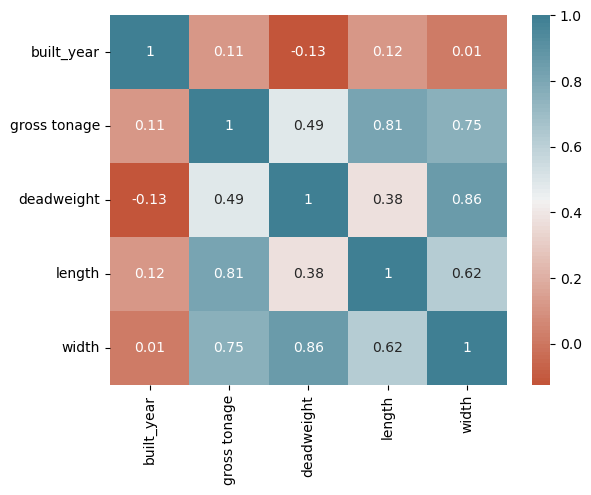

In [26]:
ax = sns.heatmap(corr_df.corr(numeric_only = True), annot=True, cmap=sns.diverging_palette(20, 220, n=100))

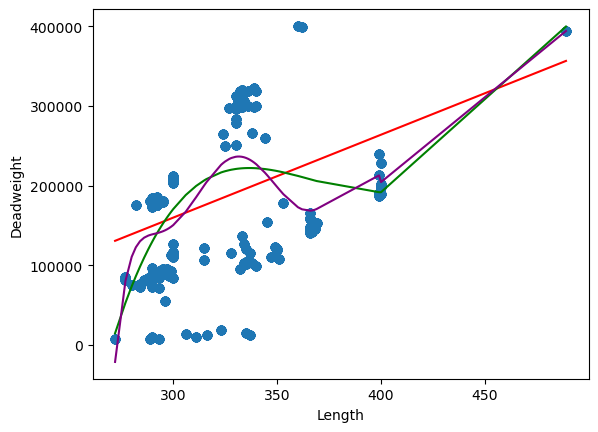

In [27]:
plt.scatter(length_array, dwt_array)
plt.xlabel('Length')
plt.ylabel('Deadweight')

plt.plot(np.unique(length_array), np.poly1d(np.polyfit(length_array, dwt_array, 1))(np.unique(length_array)), color='red')
plt.plot(np.unique(length_array), np.poly1d(np.polyfit(length_array, dwt_array, 4))(np.unique(length_array)), color='green')
plt.plot(np.unique(length_array), np.poly1d(np.polyfit(length_array, dwt_array, 7))(np.unique(length_array)), color='purple')